In [6]:
from torchvision import transforms
import os
import torchvision.datasets as datasets
data_root = os.path.abspath(os.path.join(os.getcwd()))  # get data root path
image_path = os.path.join(data_root, "flower_data")  # flower data set path
print(image_path)
assert os.path.exists(image_path), "{} path does not exist.".format(image_path)
data_transform = {
        "train": transforms.Compose([transforms.RandomResizedCrop(224),
                                     transforms.RandomHorizontalFlip(),
                                     transforms.ToTensor(),
                                     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])]),
        "val": transforms.Compose([transforms.Resize(256),
                                   transforms.CenterCrop(224),
                                   transforms.ToTensor(),
                                   transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])}


E:\pytorch_net\ResNet\flower_data


In [25]:
import torch
batch_size = 8
train_dataset = datasets.ImageFolder(root=os.path.join(image_path, "train"),
                                         transform=data_transform["train"])
print(train_dataset)
print(train_dataset.classes)
flower_list = train_dataset.class_to_idx
print(flower_list)
nw = min([os.cpu_count(), 8 if 8 > 1 else 0, 8])  # number of workers
print('Using {} dataloader workers every process'.format(nw))

train_loader = torch.utils.data.DataLoader(train_dataset,
                                               batch_size=batch_size, shuffle=True,
                                               num_workers=nw)
train_steps = len(train_loader)
print(train_steps)

Dataset ImageFolder
    Number of datapoints: 3306
    Root location: E:\pytorch_net\ResNet\flower_data\train
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )
['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}
Using 8 dataloader workers every process
414


In [15]:
nw = min([os.cpu_count(), 16 if 16 > 1 else 0, 8])  # number of workers
print(nw)

8


In [16]:
print(os.cpu_count())

16


In [19]:
train_num = len(train_dataset)
print(train_num)
print(type(train_dataset))
print(train_dataset)

3306
<class 'torchvision.datasets.folder.ImageFolder'>
Dataset ImageFolder
    Number of datapoints: 3306
    Root location: E:\pytorch_net\ResNet\flower_data\train
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )


In [23]:
print(train_dataset)

[('E:\\pytorch_net\\ResNet\\flower_data\\train\\daisy\\100080576_f52e8ee070_n.jpg', 0), ('E:\\pytorch_net\\ResNet\\flower_data\\train\\daisy\\10172379554_b296050f82_n.jpg', 0), ('E:\\pytorch_net\\ResNet\\flower_data\\train\\daisy\\10172567486_2748826a8b.jpg', 0), ('E:\\pytorch_net\\ResNet\\flower_data\\train\\daisy\\10172636503_21bededa75_n.jpg', 0), ('E:\\pytorch_net\\ResNet\\flower_data\\train\\daisy\\102841525_bd6628ae3c.jpg', 0), ('E:\\pytorch_net\\ResNet\\flower_data\\train\\daisy\\1031799732_e7f4008c03.jpg', 0), ('E:\\pytorch_net\\ResNet\\flower_data\\train\\daisy\\10391248763_1d16681106_n.jpg', 0), ('E:\\pytorch_net\\ResNet\\flower_data\\train\\daisy\\10437754174_22ec990b77_m.jpg', 0), ('E:\\pytorch_net\\ResNet\\flower_data\\train\\daisy\\10437770546_8bb6f7bdd3_m.jpg', 0), ('E:\\pytorch_net\\ResNet\\flower_data\\train\\daisy\\10437929963_bc13eebe0c.jpg', 0), ('E:\\pytorch_net\\ResNet\\flower_data\\train\\daisy\\10466290366_cc72e33532.jpg', 0), ('E:\\pytorch_net\\ResNet\\flower_d

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


原图大小： (500, 333)
data1 type； <class 'torch.Tensor'>
随机裁剪后的大小: (224, 224, 3)
(224, 224)
data2 type: <class 'PIL.Image.Image'>


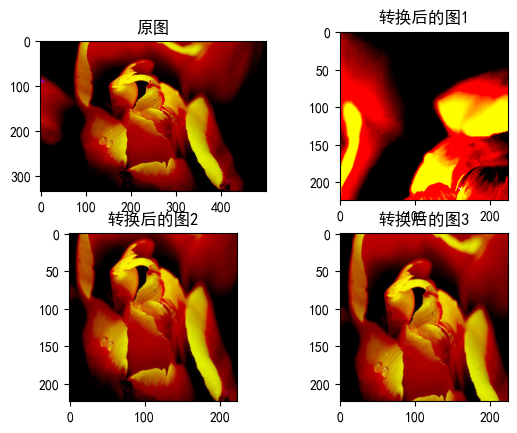

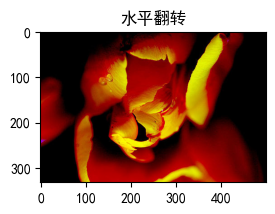

In [26]:
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
img = Image.open("./tulip.jpg")

# 解决中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

a = transforms.Compose([transforms.RandomResizedCrop(224),
 					transforms.RandomHorizontalFlip(),
                    transforms.ToTensor(),
                    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
print("原图大小：",img.size)
data1 = a(img)
print("data1 type；",type(data1))
data1 = data1.numpy().T
print("随机裁剪后的大小:",data1.shape)
data2 = transforms.RandomResizedCrop(224)(img)
data3 = transforms.RandomResizedCrop(224)(img)
data4 = transforms.RandomVerticalFlip(p=0.8)(img)
print(data2.size)
print("data2 type:",type(data2))
plt.subplot(2,2,1),plt.imshow(img),plt.title("原图")
plt.subplot(2,2,2),plt.imshow(data1),plt.title("转换后的图1")
plt.subplot(2,2,3),plt.imshow(data2),plt.title("转换后的图2")
plt.subplot(2,2,4),plt.imshow(data3),plt.title("转换后的图3")
plt.figure(2) # 创建第二个画板
plt.subplot(2,2,4),plt.imshow(data4),plt.title("垂直翻转")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(500, 333)
plt 
(224, 224, 3)


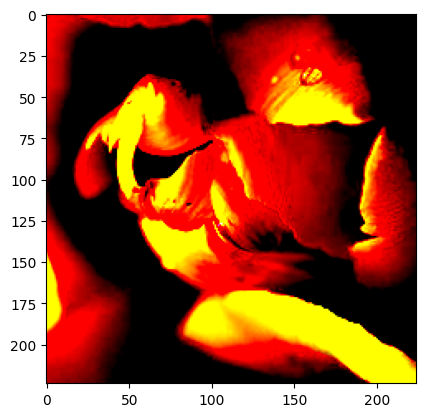

In [10]:
import torch
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
import os
data_transform = transforms.Compose(
        [transforms.Resize(256),
         transforms.CenterCrop(224),
         transforms.ToTensor(),
         transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
fanzhaun = transforms.RandomHorizontalFlip(p=0.5)
    # load image
img_path = "./tulip.jpg"
assert os.path.exists(img_path), "file: '{}' dose not exist.".format(img_path)
img = Image.open(img_path)
# plt.imshow(img)
print(img.size)
    # [N, C, H, W]
img = data_transform(img)
img1 = fanzhaun(img)
print("plt ")
plt.imshow(img.numpy().T)
print(img.numpy().T.shape)
    # expand batch dimension
img = torch.unsqueeze(img, dim=0)  # 增加一个维度 相当于batch_size
# print(img.size())

In [26]:
import torch
a = torch.tensor(
              [
                  [1, 5, 5, 2],
                  [9, -6, 2, 8],
                  [-3, 7, -9, 1]
              ])
print(a.size())
b = torch.argmax(a, dim=0)  # dim的不同值表示不同维度。特别的在dim=0表示二维中的列，dim=1在二维矩阵中表示行
print(b)
print(a.shape)

torch.Size([3, 4])
tensor([1, 2, 0, 1])
torch.Size([3, 4])


In [29]:
import torch
b = torch.tensor(
              [3.5281e-04, 2.5614e-04, 3.2024e-02, 4.0250e-03, 9.6334e-01])

print(torch.argmax(b).numpy())

4
